In [13]:
import numpy as np
import matplotlib.pyplot as plt
import koopman as koop
from scipy import stats

# Rotation on a circle

The stochastic equation is: $x_{t +1} = x_t + \nu + \omega t$
where $\nu$ is a fixed rotation angle and $\omega_t\sim Uniform[-0.5, 0.5]$. The function below generates a trajectory for number of time steps T, with rotation angle $\nu$ and initial condition $x_0$.

In [1]:
def circle_rotation(x0, T, nu):
    solution  = np.zeros(T)
    solution[0] = x0
    for i in range(1, T):
        # draw random number
        omega = np.random.rand() - 0.5
        # update
        solution[i] =np.mod(solution[i - 1] + nu + omega, 2*np.pi)
    return solution

Start by plotting a trajectory

Text(0.5, 1.0, 'Circle rotations for  100 time steps')

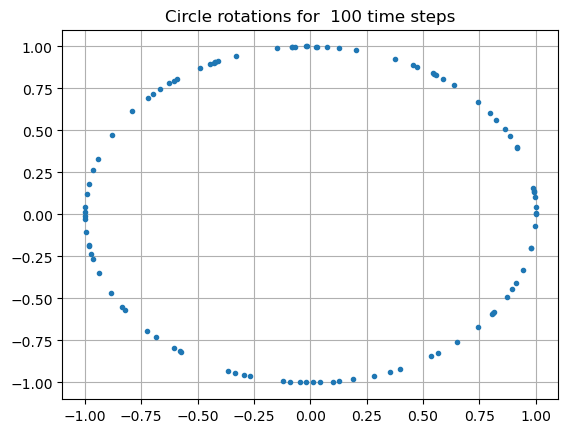

In [11]:
T = 100
rotation = circle_rotation(0, T, 0.5)
plt.plot(np.cos(rotation), np.sin(rotation), '.')
plt.grid()
plt.title('Circle rotations for  %i time steps' % T)

## L2 case
We start with Fourier basis functions made of sine and cosine up to order 5. Then the number of basis vectors is N = 10. The measures are $\sin{ix}dx, \cos{ix}dx$ for $i = 1,\dots,  5$. We sample K = 100 points from each measure and evolve them forward for T = 10 time steps. The data matrix is composed of the location of these $K*N$ points at time T.

First, we implemet a rejection sampling method for obtaining samples from $g_i$.

36.83390554488483